In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import re
import os

In [2]:
train_data = pd.read_csv('1661892619_92027_train_file.csv',names=["sentiments", "reviews"])

In [3]:
def basic_cleaning(data_frame):
    data_frame['reviews'] = data_frame.reviews.apply(lambda review: review.lower())
    data_frame['reviews'] = data_frame.reviews.apply(lambda review: review.translate(str.maketrans('', '', string.punctuation)))
    data_frame['reviews'] = data_frame.reviews.apply(lambda review: review.translate(str.maketrans('', '', string.digits)))
    data_frame['reviews'] = data_frame.reviews.apply(lambda review: re.sub("r[^a-z]",'',review))

    
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

def tokenize_data(data_frame):
    data_frame['words'] = data_frame.reviews.apply(lambda review: nltk.word_tokenize(review))

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

def remove_stopwords(list):
    stop_words_removed = []
    for i in list:
        if i not in stopwords:
            stop_words_removed.append(i)
    return stop_words_removed

In [4]:
# nltk.download('all')
#tag part of speech to get more accurate word during lemmatizaton
def tag_pos(list_of_words):
    return nltk.pos_tag(list_of_words)

#extraction of lemma words after pos taggin 
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()

def find_lemma_word(word):
    lemma_words=[]
    words_with_pos = tag_pos(word)
    for word in words_with_pos:
        if word[1].startswith('NN'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='n'))
        elif word[1].startswith('VB'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='v'))
        elif word[1].startswith('JJ'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='a'))
        elif word[1].startswith('RB'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='r'))
        else:
            lemma_words.append(word[0])
            
    return lemma_words

In [5]:
basic_cleaning(train_data)
tokenize_data(train_data)
train_data['stop_words_cleaned'] = train_data.words.apply(lambda word_list: remove_stopwords(word_list))
train_data['lemma_word'] = train_data.stop_words_cleaned.apply(lambda word_list: find_lemma_word(word_list))
train_data['cleaned_review'] = train_data.lemma_word.apply(lambda review_list: " ".join(review_list))

In [6]:
train_data.head()

,sentiments,reviews,words,stop_words_cleaned,lemma_word,cleaned_review
0,-1,eat at fioris they said youll like it they sa...,"[eat, at, fioris, they, said, youll, like, it,...","[eat, fioris, said, youll, like, saidnnis, con...","[eat, fioris, say, youll, like, saidnnis, conv...",eat fioris say youll like saidnnis convenientl...
1,-1,i just dont understand the appeal ive tried t...,"[i, just, dont, understand, the, appeal, ive, ...","[dont, understand, appeal, ive, tried, place, ...","[dont, understand, appeal, ive, tried, place, ...",dont understand appeal ive tried place twice t...
2,1,this is my go to place foa really good beef en...,"[this, is, my, go, to, place, foa, really, goo...","[go, place, foa, really, good, beef, enchilada...","[go, place, foa, really, good, beef, enchilada...",go place foa really good beef enchilada red sa...
3,-1,not impressed when i ordered the oyako bowl th...,"[not, impressed, when, i, ordered, the, oyako,...","[impressed, ordered, oyako, bowl, conversation...","[impressed, order, oyako, bowl, conversation, ...",impressed order oyako bowl conversation go som...
4,-1,this is the first time evei wrote a bad review...,"[this, is, the, first, time, evei, wrote, a, b...","[first, time, evei, wrote, bad, review, frustr...","[first, time, evei, write, bad, review, frustr...",first time evei write bad review frustrate her...


### Feature subset Selection

In [7]:
from sklearn.model_selection import train_test_split
train_review, test_review, train_sentiment, test_sentiment =train_test_split(train_data.cleaned_review,train_data.sentiments,
                                                                             shuffle=True, ## shuffel to avoide sequential classes
                                                                             random_state=0,
                                                                             stratify=train_data.sentiments, ## create a balanced sample based on the target variable
                                                                             train_size=.85) ## size of our training split testing split will be 15%

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer(min_df=.0095, ## term must be present in atleast 0.95% of the document
                                use_idf=False, ## creating a dictionary for now
                                ngram_range=(1,2)) ## adding uni and bigram
feature_matrix = tf_vectorizer.fit_transform(train_review)
feature_array = feature_matrix.toarray()

In [9]:
vocab_list = tf_vectorizer.get_feature_names_out()
vocab_list

array(['able', 'absolutely', 'accommodate', 'across', 'act', 'actual',
       'actually', 'add', 'admit', 'afte', 'aftea', 'aftei', 'afternoon',
       'aftethe', 'ago', 'agree', 'ahead', 'airport', 'allow', 'almost',
       'alone', 'along', 'already', 'also', 'although', 'always', 'amaze',
       'amazing', 'ambiance', 'american', 'amount', 'anothe', 'anyone',
       'anything', 'anyway', 'anywhere', 'apologize', 'apparently',
       'appointment', 'appreciate', 'area', 'arent', 'arizona', 'around',
       'arrive', 'ask', 'ask foa', 'ate', 'atmosphere', 'attention',
       'attentive', 'attitude', 'authentic', 'available', 'average',
       'avoid', 'away', 'awesome', 'awful', 'az', 'baand', 'back',
       'bacon', 'bad', 'bag', 'bar', 'barely', 'base', 'basic',
       'basically', 'bathroom', 'bbq', 'bean', 'beat', 'beautiful',
       'become', 'bed', 'beef', 'beer', 'begin', 'behind', 'believe',
       'best', 'bettethan', 'beyond', 'big', 'bill', 'birthday', 'bit',
       'bite',

### Select K-best features

In [556]:
from sklearn.feature_selection import SelectKBest, chi2

vocab_list = tf_vectorizer.get_feature_names_out()
select_k_best = SelectKBest(score_func=chi2, k= int(len(vocab_list)*.11))
train_sentiment_np_array = np.array(train_sentiment)
select_k_best.fit(feature_array, train_sentiment_np_array)
mask = select_k_best.get_support()
k_best_feature = vocab_list[mask]

In [557]:
k_best_feature.shape

(105,)

In [558]:
from sklearn.feature_extraction.text import TfidfVectorizer
selected_tf_vectorizer = TfidfVectorizer(use_idf=True, vocabulary=k_best_feature, sublinear_tf=True, ngram_range=(1,2))
selected_feat_array = selected_tf_vectorizer.fit_transform(train_review).toarray()
selected_test_array = selected_tf_vectorizer.transform(test_review).toarray()
observed_value_table = pd.DataFrame(selected_tf_vectorizer.get_feature_names_out(), columns=['features'])

In [559]:
selected_test_array.shape

(2700, 105)

In [560]:
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components=int(len(selected_tf_vectorizer.get_feature_names_out())*.94))
x_train = pca.fit_transform(selected_feat_array,train_sentiment)
x_test = pca.transform(selected_test_array)

In [561]:
test_sentiments_array = np.array(test_sentiment)
train_sentiments_array = np.array(train_sentiment)
x_test.shape
# chi_sqare_table['max_chi_value'] = find_max_chi_val(chi_sqare_table['positiev_sentiments'], chi_sqare_table['negatiev_sentiments'])

(2700, 98)

In [562]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
track_precision=[]
mx_score = 0
classifer_max = 0
for i in range(1,71):
    print(i)
    classifer = KNeighborsClassifier(n_neighbors=i,n_jobs=3,weights='distance')
    classifer.fit(x_train, train_sentiment)
    sentiments_predict = classifer.predict(x_test)
    score = metrics.accuracy_score(test_sentiment,sentiments_predict)
    print(score)
    track_precision.append(score)
    if score > mx_score:
        mx_score = score
        classifer_max = classifer

1
0.7692592592592593
2
0.7814814814814814
3
0.8062962962962963
4
0.8018518518518518
5
0.8107407407407408
6
0.8137037037037037
7
0.8077777777777778
8
0.8181481481481482
9
0.8140740740740741
10
0.8237037037037037
11
0.8166666666666667
12
0.8255555555555556
13
0.8237037037037037
14
0.8274074074074074
15
0.8266666666666667
16
0.8255555555555556
17
0.825925925925926
18
0.8285185185185185
19
0.8281481481481482
20
0.8281481481481482
21
0.8255555555555556
22
0.8288888888888889
23
0.8288888888888889
24
0.8274074074074074
25
0.8274074074074074
26
0.8248148148148148
27
0.8255555555555556
28
0.8281481481481482
29
0.8292592592592593
30
0.825925925925926
31
0.8281481481481482
32
0.825925925925926
33
0.8262962962962963
34
0.8307407407407408
35
0.83
36
0.8285185185185185
37
0.8244444444444444
38
0.827037037037037
39
0.8255555555555556
40
0.83
41
0.8251851851851851
42
0.8277777777777777
43
0.827037037037037
44
0.8281481481481482
45
0.827037037037037
46
0.8262962962962963
47
0.8262962962962963
48
0.8274

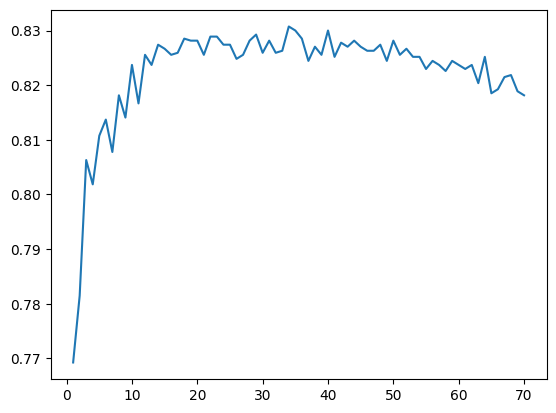

In [563]:
plt.plot(range(1,71), track_precision)

In [564]:
mx_score

0.8307407407407408

In [566]:
from sklearn.metrics.pairwise import euclidean_distances
def calculate_neighbour(train_data, test_data):
    
    numpy_distances = np.array(euclidean_distances(train_data,[test_data]).flatten())
    # storing inverse of distances
    inv_distance = []
    for i in numpy_distances:
        # Divided exception avoided  by using a very small value
        inv_distance.append(np.divide(1,max(i**3,.000000000000000000001**3)))

    inv_distance = np.array(inv_distance)
    indexes_by_shortest_dist = inv_distance.argsort() ## returns indexes from smallest to largest

    return  np.flip(indexes_by_shortest_dist)

In [567]:
def find_majority_and_predict(train_data, test_data, train_sentiments, K):
    nearest_neighbors_indexes = calculate_neighbour(train_data, test_data)
    sentiment_classes = []
    for i in range(0,K):
        sentiment_classes.append(train_sentiments[nearest_neighbors_indexes[i]])
        
    return max(sentiment_classes, key=sentiment_classes.count)

In [568]:
def find_accuracy(predicted_sentiment, real_sentiment):
    correct_prediction = 0
    for i in range(0,len(predicted_sentiments)):
        if predicted_sentiment[i] == real_sentiment[i]:
            correct_prediction += 1
    return np.divide(correct_prediction, len(predicted_sentiment))

In [570]:
print(len(selected_test_array))
predicted_sentiments = []
for i in range(0,len(x_test)):
    print(i)
    predicted_sentiments.append(find_majority_and_predict(x_train,x_test[i], train_sentiments_array,34))
score =  find_accuracy(predicted_sentiments, test_sentiments_array)

2700
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
2

In [571]:
score

0.8225925925925925

In [206]:
result_test_df = pd.read_csv('1661892619_9579706_test_file.csv', names=['reviews'])
basic_cleaning(result_test_df)
tokenize_data(result_test_df)
result_test_df['stop_words_cleaned'] = result_test_df.words.apply(lambda word_list: remove_stopwords(word_list))
result_test_df['lemma_word'] = result_test_df.stop_words_cleaned.apply(lambda word_list: find_lemma_word(word_list))
result_test_df['cleaned_review'] = result_test_df.lemma_word.apply(lambda review_list: " ".join(review_list))
unlabeled_test_feat_matrix = selected_tf_vectorizer.transform(result_test_df['cleaned_review']).toarray()

In [207]:
unlabeled_test_feat_matrix.shape

(18000, 99)

In [208]:
predicted_sentiments = []
print(len(unlabeled_test_feat_matrix))
for i in range(0,len(unlabeled_test_feat_matrix)):
    # print(i)
    predicted_sentiments.append(find_majority_and_predict(selected_feat_array,unlabeled_test_feat_matrix[i], train_sentiments_array, 34))


18000


In [209]:
len(predicted_sentiments)

18000

In [210]:
import csv
outfile = open('./results.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], predicted_sentiments))
outfile.close()